In [1]:
import numpy as np
import pandas as pd
import mlflow
import pycaret
from pycaret.classification import *

c:\Users\Yashar\anaconda3\envs\pycaret_env\lib\site-packages\pydantic\_internal\_config.py:373: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [2]:
data = pd.read_csv('data/raw_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
s = setup(
    data=data,
    target='Churn',
    session_id=123,
    ignore_features=['customerID'],
    log_experiment= True,
    experiment_name='churn1'
)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Numeric features,3


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7789,0.8060,0.7789,0.7727,0.7741,0.4110,0.4139,0.0670
knn,K Neighbors Classifier,0.7716,0.7792,0.7716,0.7642,0.7667,0.3912,0.3932,0.5130
lr,Logistic Regression,0.7548,0.8295,0.7548,0.7404,0.6886,0.1557,0.2275,0.9350
qda,Quadratic Discriminant Analysis,0.7542,0.7929,0.7542,0.7250,0.7044,0.1996,0.2397,0.0830
rf,Random Forest Classifier,0.7501,0.7778,0.7501,0.7130,0.6983,0.1819,0.2174,0.1210
svm,SVM - Linear Kernel,0.7462,0.7937,0.7462,0.7132,0.6917,0.2081,0.2471,0.0720
ridge,Ridge Classifier,0.7385,0.7839,0.7385,0.6907,0.6592,0.0793,0.1278,0.0690
lda,Linear Discriminant Analysis,0.7385,0.7338,0.7385,0.6907,0.6592,0.0793,0.1278,0.0680
et,Extra Trees Classifier,0.7379,0.7473,0.7379,0.6890,0.6710,0.1069,0.1467,0.1120
lightgbm,Light Gradient Boosting Machine,0.7349,0.7311,0.7349,0.7270,0.7271,0.2888,0.2942,0.1620


In [7]:
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


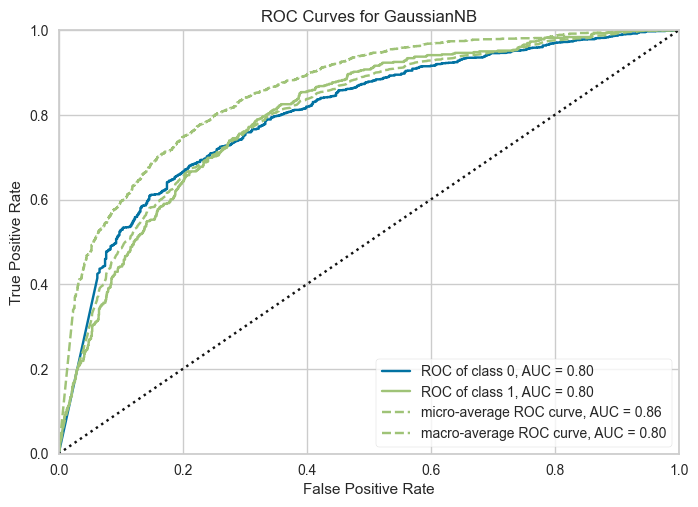

In [8]:
plot_model(best_model,plot='auc')

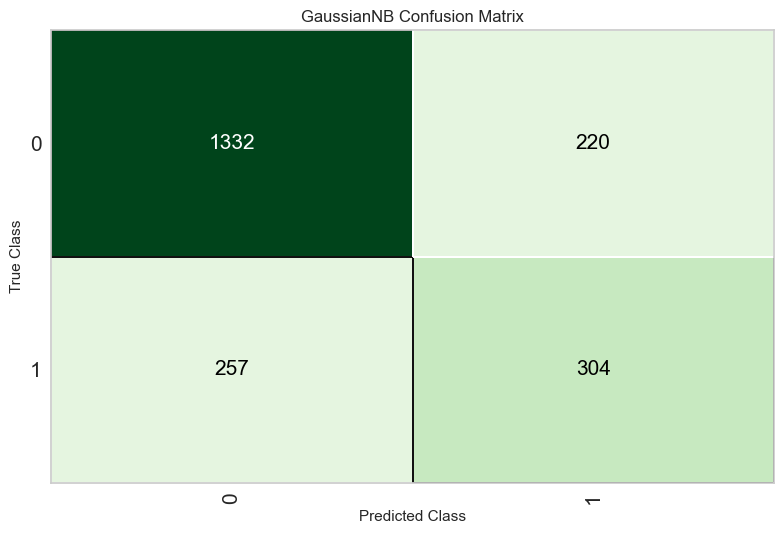

In [10]:
plot_model(best_model,plot='confusion_matrix')

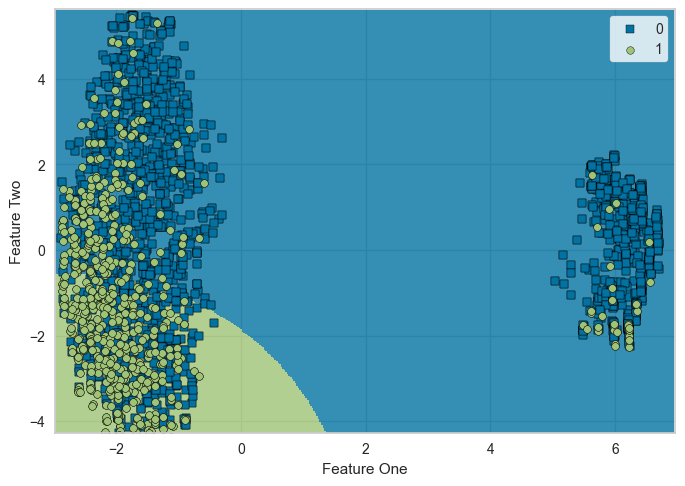

In [11]:
plot_model(best_model,plot='boundary')

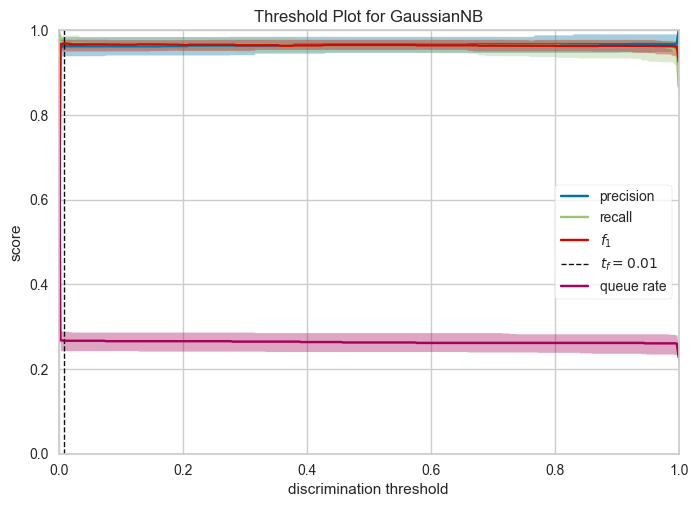

In [14]:
plot_model(best_model,plot='threshold')

In [15]:
save_model(best_model,'outputs\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False...
                                                               verbose=0))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['TotalCharges'],
                       

In [16]:
!mlflow ui

^C
